<h1><center>Predicting Bankrupcy using Statistical learning</center></h1>

### Objective

Economic crises give rise to conversations about market sustainability, and the prefered tools that can be used to predict it. Bankruptcy of companies effects the financial market and hence it is very important to be able predict bankruptcy among companies by monitoring multiple variables. In this project, we build four different statistical learning classification algorithms to predict wheter or not a company will go bankrupt given some predictor variable. The models are K-nearest neighbors, Neural network, Logistic regression and Linear discriminant analysis. Comparative analysis is made by using a 10-fold cross validation in order to identify the model that is better suited for predicting economic bankruptcy of companies given the predictors.

### About the dataset

The dataset used is the bankruptcy status, <code>(Bankrupt)</code>, of some companies collected over a period of 10 years. It contains 1321 observations with 15 financial ratios for each company. Some of the companies went bankrupt during the period (indicated by “1”), while the others survived (indicated by a “0”). All predictors are continuous and are describes below:

<code>fyear</code>: Fiscal year<br />
<code>at</code>: Assets-Total <br />
<code>Bkvlps</code>: Book value per share <br />
<code>invt:</code>: Inventories-Total<br />
<code>Lt:</code>: Liabilities-Total<br />
<code>rectr</code>: Receivables-Trade<br />
<code>cogs</code>: Costs of goods sold<br />
<code>dvt</code>: Dividends-Total<br />
<code>ebit</code>: Ernings before interest and taxes<br />
<code>gp</code>: Gross profit<br />
<code>ni</code>: Net income (Loss)<br />
<code>oiadp</code>: Operating income after depreciation revt: Revenue-Total<br />
<code>dvpsx_f</code>: Dividends per Share-Ex-Date-Fiscal mkvalt: Market value-Total-Fiscal<br />
<code>prch_f</code>: Price high-Annual-Fiscal<br />
<code>Bankrupt</code>: Bankruptcy (Response variable)<br />

The first 5 rows of the dataset with all the variables (except <code>fyear</code>) is shown in the table below: 

In [1]:
import pandas as pd 
bankrupt=pd.read_csv("/Users/philipamewudah/Desktop/text books/Statistical Learning 2/final project/bankrupt.csv")
bankrupt=bankrupt.drop(columns=["fyear"])
bankrupt.head()

,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f,Bankrupt
0,9.252,1.9283,0.000,0.731,0.079,0.750,0.0,-0.379,0.442,-0.288,-0.379,1.192,0.0,10.3847,2.635,no
1,20.315,0.3903,0.066,5.240,0.106,1.407,0.0,-4.481,-0.028,-4.585,-4.481,1.379,0.0,22.2900,2.140,no
2,5.182,3.6446,1.558,1.501,0.193,7.638,0.0,-0.788,2.843,0.262,-0.788,10.481,0.0,3.7370,4.400,no
3,1.038,0.0083,0.289,0.903,0.218,0.756,0.0,-1.361,0.632,-1.365,-1.361,1.388,0.0,18.9306,1.750,no
4,10.301,0.2367,1.626,6.099,1.150,8.108,0.0,0.651,3.008,-0.175,0.651,11.116,0.0,1.3313,0.120,no


### Summary Statistics of the dataset

697 companies went bankrupt over the period and 624 who didn't as shown below. The row counts, mean, standard deviation and percentiles of the predictors (all of which are continuous variables) are also summarized below. 

In [3]:
# summary of response variable
bankrupt["Bankrupt"].value_counts()

yes    697
no     624
Name: Bankrupt, dtype: int64

In [14]:
# summary of predictors
bankrupt.describe()

,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f
count,1.321000e+03,1321.000000,1321.000000,1.321000e+03,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1321.000000,1.321000e+03,1321.000000
mean,9.511867e+03,4.543269,1908.493267,8.877328e+03,3140.169148,1251.550788,39.682273,232.908369,491.334412,-18.965758,232.908369,1742.885200,0.335449,5.774355e+03,16.149576
std,1.120989e+05,22.073326,23675.885178,1.048727e+05,47499.012821,6013.594833,505.289521,2910.195059,3072.448546,1480.648303,2910.195059,8162.959277,3.912116,1.606149e+05,21.804876
min,0.000000e+00,-602.908200,0.000000,0.000000e+00,0.000000,-188.341000,-0.064000,-7655.000000,-5257.845000,-27684.000000,-7655.000000,-4234.472000,0.000000,1.000000e-04,0.005000
25%,1.102600e+01,0.001600,0.000000,4.869000e+00,0.301000,4.377000,0.000000,-1.774000,2.876000,-12.986000,-1.774000,10.378000,0.000000,9.444900e+00,2.050000
50%,2.368390e+02,2.646500,4.022000,1.212490e+02,9.483000,89.951000,0.000000,1.524000,34.181000,-0.216000,1.524000,160.478000,0.000000,6.589980e+01,8.850000
75%,8.664170e+02,9.351700,61.504000,7.096470e+02,79.729000,676.373000,0.854000,36.036000,210.542000,8.236000,36.036000,877.427000,0.000000,3.709207e+02,22.770000
max,2.187631e+06,273.671800,462103.000000,2.074033e+06,994847.000000,109794.000000,10769.000000,65332.000000,67835.000000,24728.000000,65332.000000,157333.000000,135.230000,5.820729e+06,221.000000


### Correlation and Multicolinearity

The heatmap of the correlation matrix of the predictors depicts high correlations among some pairs of the predictors when correlation coefficients in the heatmap is 1 or very close to 1. 

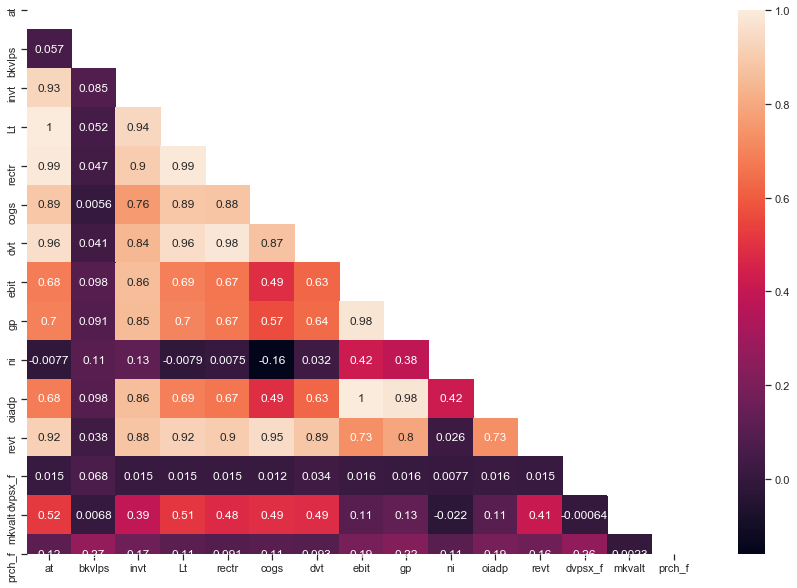

In [32]:
import seaborn as sns; import matplotlib.pyplot as plt

plt.subplots(figsize=(15, 10)); 
cor=bankrupt.corr(); matrix=np.triu(cor)
sns.heatmap(cor,annot=True, mask=matrix)
plt.show()

### Multicolinearity

The VIF values below also reveal the presesnce of multicolinearity among the predictors for VIF values greater than 5 or 10. Correlation and Multicolinearity among predictors voilates the assumption of independence of the predictors for most linear models. Assumptions are not a priority in this setting as long as prediction accuracy is high, however, it can help in deciding what predictive models to consider. For instance, the predictors can be standardized to avoid multicolinearity before fitting some of the predictive models.

In [24]:
# import Library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif["variable"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return(vif)

# calculate the vifs
X=bankrupt.iloc[:,:-1]; calc_vif(X).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
variable,at,bkvlps,invt,Lt,rectr,cogs,dvt,ebit,gp,ni,oiadp,revt,dvpsx_f,mkvalt,prch_f
VIF,5117.4,1.30235,155.903,6526.29,441.464,inf,58.6607,inf,inf,2.26884,inf,inf,1.10012,3.23211,1.49266


### Brief description of the models under consideration.

- Logistic regression (LR): <br /> 
The logistic regression is one of the commonly used models to predict the probability that a binary re- sponse variable belongs to a particular class of interest given some categorical or continuous predictors. In the bankruptcy dataset for this project, the response of interest is whether or not a company went bankrupt, (Bankrupt=1), given the various financial ratios. When the predicted probability is > 0.5, the company is classified as bankrupt, otherwise the company is not classified as bankrupt. Some assumption of the logistic regression is that there shouldn’t be any multicollinearity among predictors and the error terms of the model should be independent and normally distributed. Relative to other models, logistic regression model perform rather well when the classes are not perfectly separated.
- K-nearest neighbors (KNN): <br />
K-nearest neighbors model is also a popular classification algorithm that is used to predict the classe of an individual’s response variables given some predictors by using information of the K nearest neighbors in the training set around the individual in question and assigning it to the class with the highest estimated probability. In K-nearest neighbors models, K is the specified number of other individuals whose Euclidean distance (calculated using the values of the predictors values) from the individual whose class is to be predicted is small enough; The predicted class is the class of the majority number of the K units. In the case of the bankruptcy data with binary response, a company is classified as bankrupt if majority of the k other companies are also bankrupt.
- Neural networks (NN): <br />
Neural network can be used to predict both continuous and categorical responses. Neural network algorithm is a computational learning system that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the neural network is inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses. Neural networks can usually blend different algorithms together to process complex data inputs and make predictions for the response variable of interest.
- Linear discriminant analysis (LDA):<br />
The linear discriminant analysis is a classification algorithm that is used to classify binary or mul- tiple class response variables given continuous predictor variables that are assumed to be normally distributed. In LDA, the distribution of the predictors are separately modeled in each of the response classes (i.e. given Y ), and then the Bayes’ theorem is used to flip the conditional probabilities around into Pr(Y = k|X = x). The required normal distribution of the predictors makes the lda model very similar in form to logistic regression. However, unlike the logistic regression, the lda performs relatively well when the classes are well separated.


### Fitting the four models to the Bankruptcy data and using the 10- fold cross validation to select the prefered model.

In [79]:
# import packages
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# create an empty dataframe to store error rates 
cv=pd.DataFrame()

# logistic regression model
X=bankrupt.iloc[:,:-1];y=bankrupt.iloc[:,-1]
cv["LR"]=cross_val_score(LogisticRegression(solver='liblinear'),X,y,cv=10)

# linear discriminant analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.decomposition import PCA
# cv["LDA"]=cross_val_score(LinearDiscriminantAnalysis(),X,y,cv=10) # multicolinearity causing error message

# Linear discriminant analysis using principal components of predictors
X_std=pd.DataFrame(preprocessing.StandardScaler().fit_transform(X),columns=X.columns)
pca=PCA(n_components=X.shape[1]).fit(X_std);
X_pcomp=pd.DataFrame(pca.transform(X_std),columns=X.columns) 
cv["LDA_pcomp"]=cross_val_score(LinearDiscriminantAnalysis(),X_pcomp,y,cv=10)

# K nearest neighbors 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3)
knn_acc=[]
for i in range(19):
    knn=KNeighborsClassifier(i+1)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    knn_acc.append(metrics.accuracy_score(y_test,y_pred))       
knn_acc=np.asarray(knn_acc)
best_k=np.where(knn_acc==np.max(knn_acc))[0][0]+1
cv["KNN"]=cross_val_score(KNeighborsClassifier(best_k),X_pcomp,y,cv=10)



cv.describe()

,LR,LDA_pcomp,KNN
count,10.000000,10.000000,10.000000
mean,0.823495,0.689961,0.847003
std,0.049751,0.080380,0.038533
min,0.786260,0.586466,0.793893
25%,0.789773,0.642686,0.815129
50%,0.799260,0.667948,0.836514
75%,0.830827,0.746183,0.888258
max,0.916667,0.833333,0.894737


array([0.90428212, 0.86397985, 0.87657431, 0.85138539, 0.86901763,
       0.86146096, 0.86649874, 0.84382872, 0.84382872, 0.84130982,
       0.83627204, 0.82871537, 0.83375315, 0.83123426, 0.83375315,
       0.83123426, 0.83123426, 0.82619647, 0.82367758])

In [34]:
LogisticRegression(solver='liblinear').fit(X,y).coef_

array([[-0.00132084, -0.01261291, -0.00490986,  0.00137623,  0.01740108,
        -0.0019497 , -0.00559498, -0.00313454,  0.00431685,  0.00044497,
        -0.00313454,  0.00236715,  0.02945395,  0.00100076, -0.03606084]])

In [38]:
X.shape[1]

15

In [50]:
range(2)

range(0, 2)

In [60]:
knn_acc=np.empty((20,1))
knn_acc[0]=1
knn_acc[1]=20
knn_acc

array([[ 1.],
       [20.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])